<a href="https://colab.research.google.com/github/FinleyHiscock/github-slideshow/blob/master/Ferrero_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Data Exploration

In [108]:
import pandas as pd
df = pd.read_csv('Retail_Sales_Data.csv')

In [109]:
filtered_columns = df.columns[~df.columns.str.contains('competition')]
print(df[filtered_columns].head().to_string())

  retailer  store_id  week                   product                                                               description  regular_price  promo_price      value    volume   quantity
0  retail1         1     1       MintyFresh Mint 18g                                           MintyFresh refresh mint 18grams      10.308645     6.439745  85.368310  3.953882   9.707949
1  retail1         1     1    ChocoDelight Dark 200g                                                  200g ChocoDelight smooth       7.947956     4.756319  82.924731  2.991418  14.922586
2  retail1         1     1   ChocoDelight White 350g                                               350g ChocoDelight delicious      13.439368     8.415817  52.527762  6.513600  12.889607
3  retail1         1     1  NuttyCream Hazelnuts 80g                                       delightful Hazelnuts 80g NuttyCream       5.112777          NaN  48.373782  5.489587  14.374834
4  retail1         1     1        DarkDream Dark 60g  A decadent 

In [110]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   retailer                      8840 non-null   object 
 1   store_id                      8840 non-null   int64  
 2   week                          8840 non-null   int64  
 3   product                       8840 non-null   object 
 4   description                   8840 non-null   object 
 5   regular_price                 8840 non-null   float64
 6   competition_1_regular_price   8840 non-null   float64
 7   competition_2_regular_price   8840 non-null   float64
 8   competition_3_regular_price   8840 non-null   float64
 9   competition_4_regular_price   8840 non-null   float64
 10  competition_5_regular_price   8840 non-null   float64
 11  competition_6_regular_price   8840 non-null   float64
 12  competition_7_regular_price   8840 non-null   float64
 13  com

In [111]:
print(df.head(5))

  retailer  store_id  week                   product  \
0  retail1         1     1       MintyFresh Mint 18g   
1  retail1         1     1    ChocoDelight Dark 200g   
2  retail1         1     1   ChocoDelight White 350g   
3  retail1         1     1  NuttyCream Hazelnuts 80g   
4  retail1         1     1        DarkDream Dark 60g   

                                         description  regular_price  \
0                    MintyFresh refresh mint 18grams      10.308645   
1                           200g ChocoDelight smooth       7.947956   
2                        350g ChocoDelight delicious      13.439368   
3                delightful Hazelnuts 80g NuttyCream       5.112777   
4  A decadent DarkDream dark chocolate ice cream ...      14.085425   

   competition_1_regular_price  competition_2_regular_price  \
0                    10.624815                    10.013451   
1                     7.748726                     7.589198   
2                    13.751508                 

In [112]:
df['price_difference'] = df['regular_price'] - df['promo_price']

In [113]:
print(df[['regular_price', 'promo_price', 'price_difference', 'value', 'volume', 'quantity']].describe().to_string())

       regular_price  promo_price  price_difference        value       volume     quantity
count    8840.000000   646.000000        646.000000  8840.000000  8840.000000  8840.000000
mean       12.502475     8.887033          3.754397    55.449495     5.521665    11.067785
std         4.293504     3.507939          1.997959    25.911704     2.580647     3.948788
min         5.001985     2.523775          0.595501    10.011517     1.000177     1.094179
25%         8.799638     6.027676          2.136069    33.167182     3.306865     8.221081
50%        12.467097     8.716231          3.276092    56.069822     5.521104    11.098918
75%        16.191315    11.502287          5.019905    77.350443     7.752540    14.008293
max        19.998458    17.604067          9.576376    99.996789     9.999793    21.049790


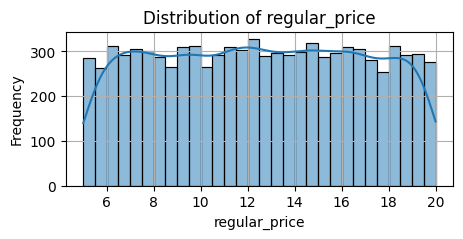

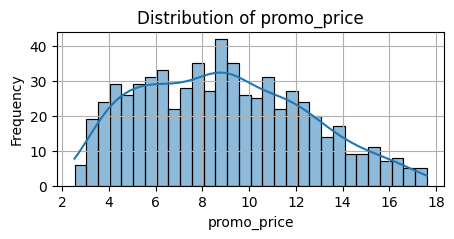

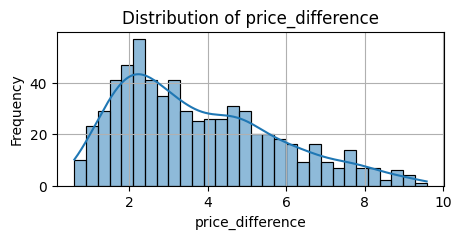

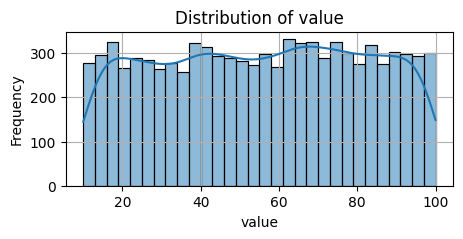

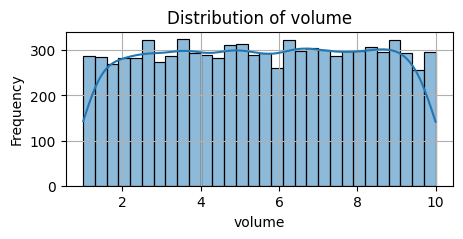

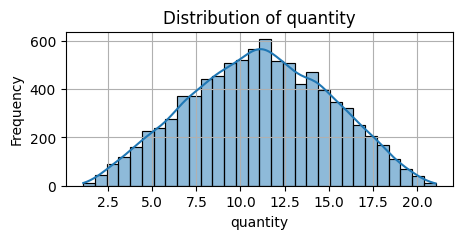

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['regular_price', 'promo_price', 'price_difference', 'value', 'volume', 'quantity']

for col in columns_of_interest:
    plt.figure(figsize=(5, 2))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

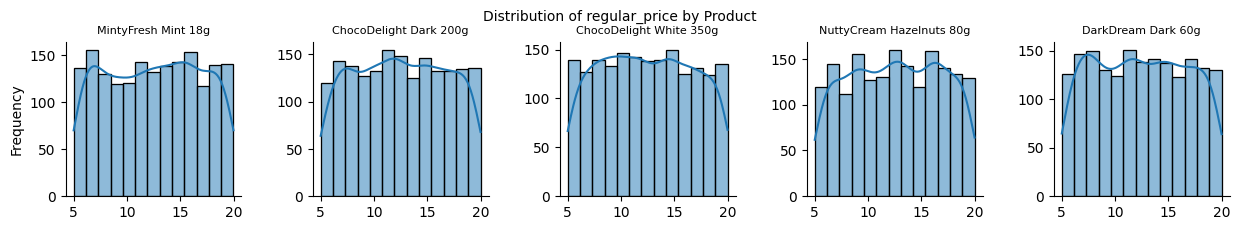

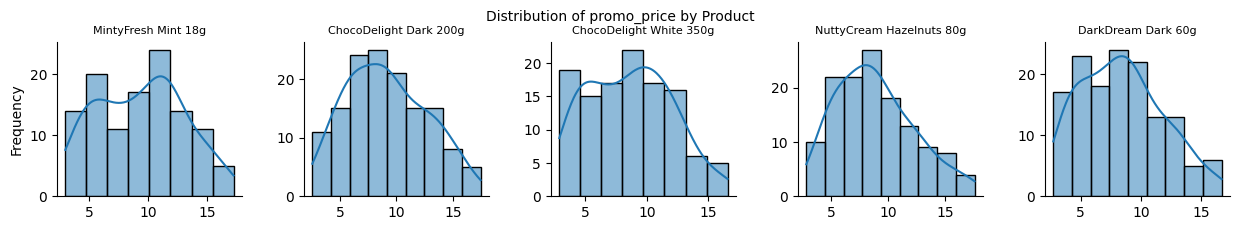

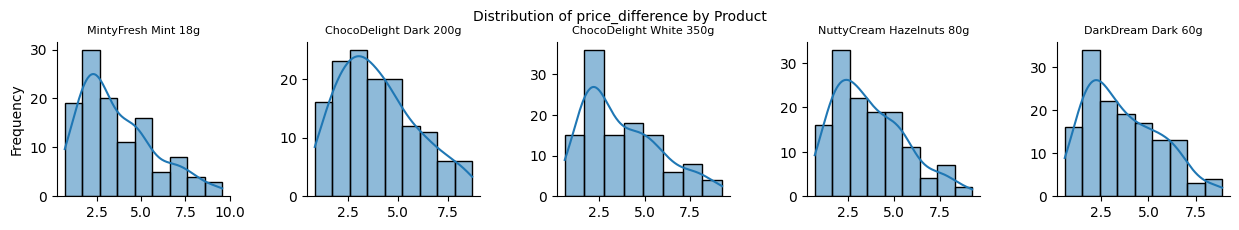

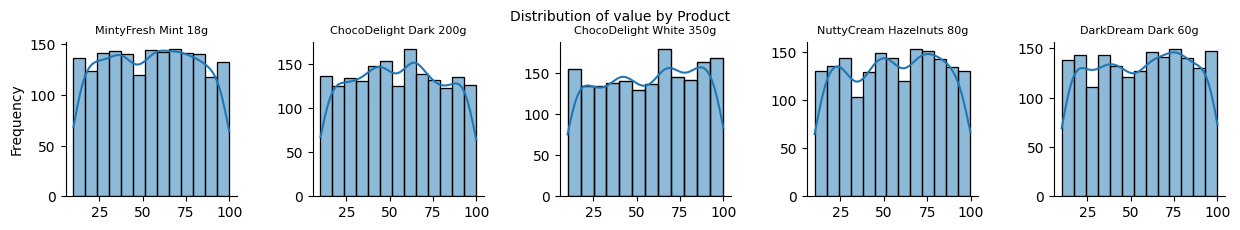

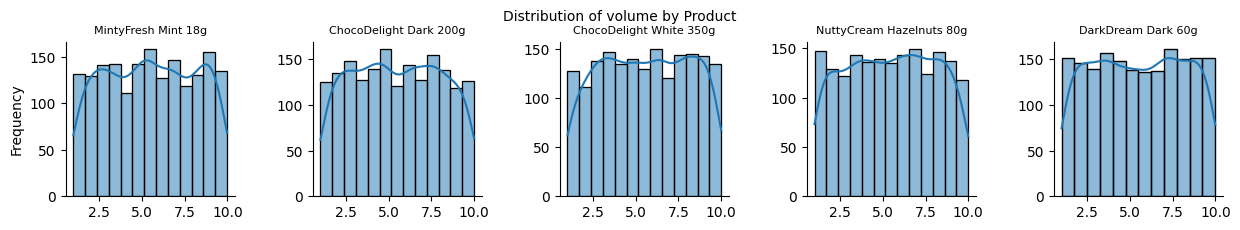

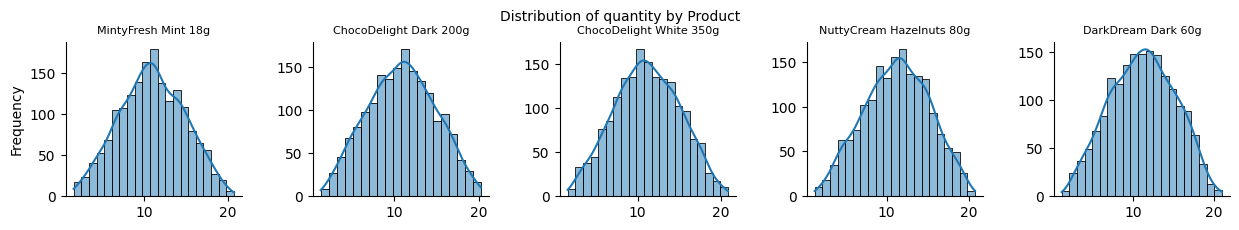

In [115]:

import matplotlib.pyplot as plt
import seaborn as sns

columns = ['regular_price', 'promo_price', 'price_difference', 'value', 'volume', 'quantity']

for col in columns:
    g = sns.FacetGrid(df, col="product", col_wrap=5, height=2.5, sharex=False, sharey=False)
    g.map(sns.histplot, col, kde=True)
    g.set_titles(col_template="{col_name}", size=8)
    g.set_axis_labels(f"", "Frequency")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f"Distribution of {col} by Product", fontsize=10)
    plt.show()

In [116]:
non_missing_counts = df.groupby('product')['promo_price'].apply(lambda x: x.notnull().sum()).reset_index()
non_missing_counts.columns = ['product', 'Non-Missing Promo Price Count']

total_counts = df.groupby('product').size().reset_index(name='Total Count')
merged_counts = pd.merge(non_missing_counts, total_counts, on='product')
merged_counts['Percentage Non-Missing Promo Price'] = (merged_counts['Non-Missing Promo Price Count'] / merged_counts['Total Count']) * 100
merged_counts_sorted = merged_counts.sort_values(by='Percentage Non-Missing Promo Price', ascending=False)

print(merged_counts_sorted[['product', 'Non-Missing Promo Price Count', 'Total Count', 'Percentage Non-Missing Promo Price']].to_string())

                    product  Non-Missing Promo Price Count  Total Count  Percentage Non-Missing Promo Price
2        DarkDream Dark 60g                            141         1768                            7.975113
0    ChocoDelight Dark 200g                            139         1768                            7.861991
4  NuttyCream Hazelnuts 80g                            133         1768                            7.522624
1   ChocoDelight White 350g                            117         1768                            6.617647
3       MintyFresh Mint 18g                            116         1768                            6.561086


In [117]:
non_missing_counts = df.groupby(['retailer'])['promo_price'].apply(lambda x: x.notnull().sum()).reset_index()
non_missing_counts.columns = ['retailer', 'Non-Missing Promo Price Count']

total_counts = df.groupby(['retailer']).size().reset_index(name='Total Count')

merged_counts = pd.merge(non_missing_counts, total_counts, on='retailer')
merged_counts['Percentage Non-Missing Promo Price'] = (merged_counts['Non-Missing Promo Price Count'] / merged_counts['Total Count']) * 100
print(merged_counts[['retailer', 'Non-Missing Promo Price Count', 'Total Count', 'Percentage Non-Missing Promo Price']].to_string())

  retailer  Non-Missing Promo Price Count  Total Count  Percentage Non-Missing Promo Price
0  retail1                            395         5200                            7.596154
1  retail2                            251         3640                            6.895604


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   retailer                      8840 non-null   object 
 1   store_id                      8840 non-null   int64  
 2   week                          8840 non-null   int64  
 3   product                       8840 non-null   object 
 4   description                   8840 non-null   object 
 5   regular_price                 8840 non-null   float64
 6   competition_1_regular_price   8840 non-null   float64
 7   competition_2_regular_price   8840 non-null   float64
 8   competition_3_regular_price   8840 non-null   float64
 9   competition_4_regular_price   8840 non-null   float64
 10  competition_5_regular_price   8840 non-null   float64
 11  competition_6_regular_price   8840 non-null   float64
 12  competition_7_regular_price   8840 non-null   float64
 13  com

In [119]:
non_missing_counts = df.groupby(['retailer', 'store_id'])['promo_price'].apply(lambda x: x.notnull().sum()).reset_index()
non_missing_counts.columns = ['Retailer', 'Store ID', 'Non-Missing Promo Price Count']
print(non_missing_counts)

   Retailer  Store ID  Non-Missing Promo Price Count
0   retail1         1                             34
1   retail1         2                             44
2   retail1         3                             45
3   retail1         4                             40
4   retail1         5                             26
5   retail1         6                             39
6   retail1         7                             39
7   retail1         8                             38
8   retail1         9                             42
9   retail1        10                             48
10  retail2         1                             39
11  retail2         2                             22
12  retail2         3                             33
13  retail2         4                             34
14  retail2         5                             44
15  retail2         6                             39
16  retail2         7                             40


In [120]:
unique_retailers = df['retailer'].unique()
print(unique_retailers)

['retail1' 'retail2']


In [121]:
unique_descriptions_per_product = df.groupby('retailer')['store_id'].unique()
for product, descriptions in unique_descriptions_per_product.items():
    print(f"Retailer: {product}")
    print(f"Stores: {list(descriptions)}")
    print("")

Retailer: retail1
Stores: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Retailer: retail2
Stores: [1, 2, 3, 4, 5, 6, 7]



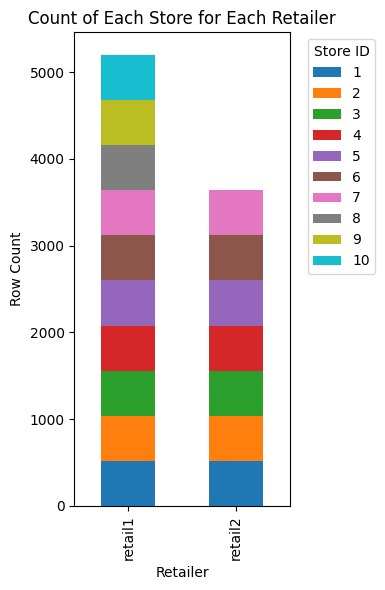

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

row_counts = df.groupby(['retailer', 'store_id']).size().unstack(fill_value=0)
row_counts.plot(kind='bar', stacked=True, figsize=(4, 6))

plt.xlabel("Retailer")
plt.ylabel("Row Count")
plt.title("Count of Each Store for Each Retailer")
plt.legend(title="Store ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

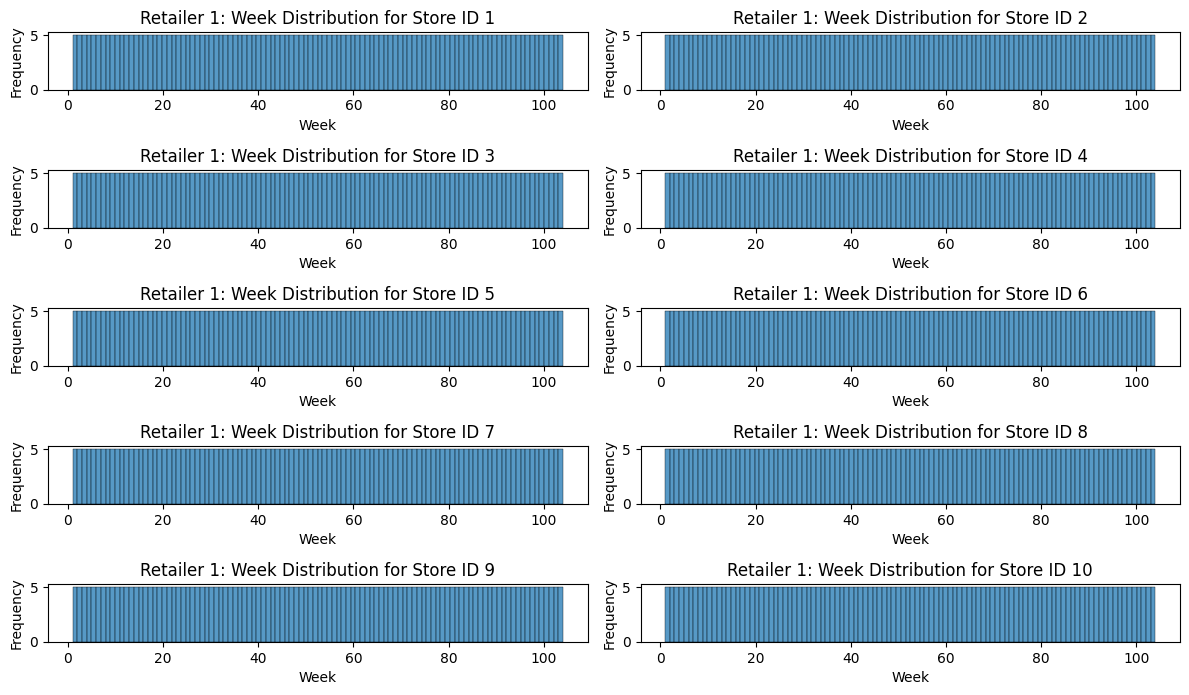

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

df_retailer1 = df[df['retailer'] == 'retail1']
stores = df_retailer1['store_id'].unique()

plt.figure(figsize=(12, 8))
for i, store in enumerate(stores, 1):
    plt.subplot(len(stores) // 2 + 1, 2, i)
    sns.histplot(df_retailer1[df_retailer1['store_id'] == store]['week'], bins=104)
    plt.title(f"Retailer 1: Week Distribution for Store ID {store}")
    plt.xlabel("Week")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

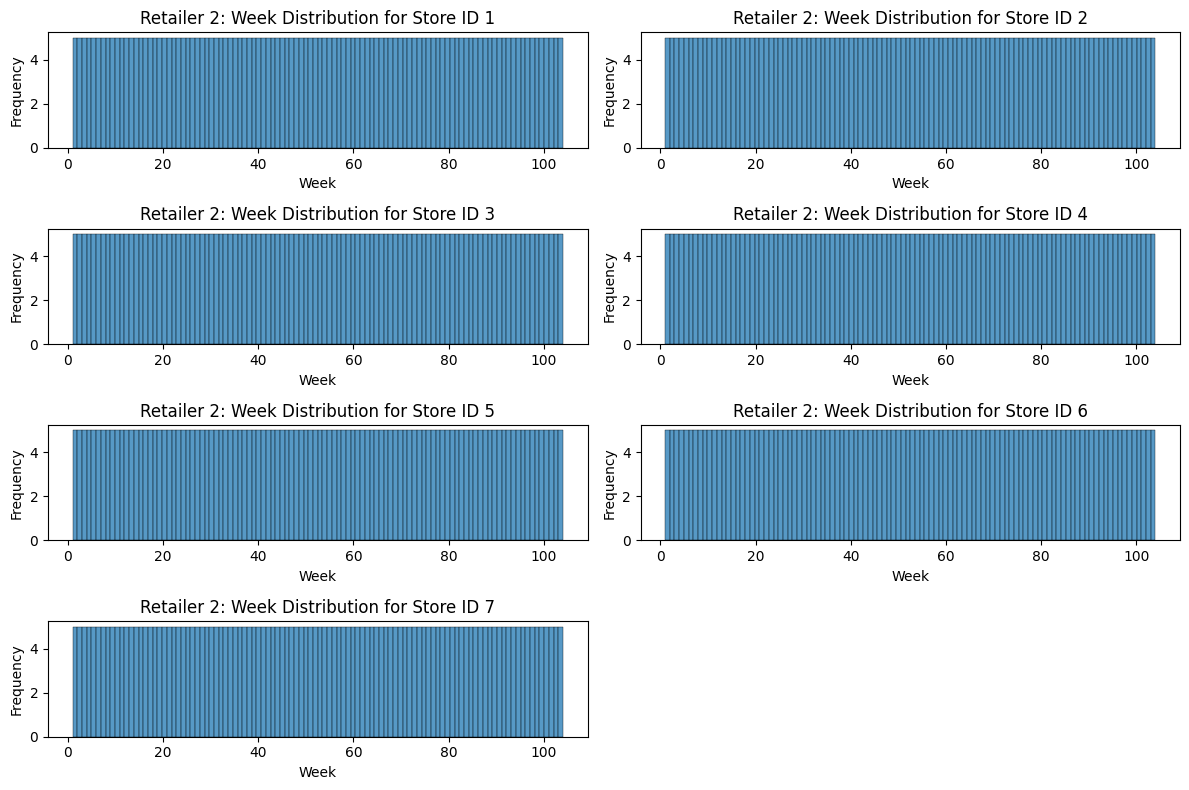

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

df_retailer2 = df[df['retailer'] == 'retail2']
stores = df_retailer2['store_id'].unique()

plt.figure(figsize=(12, 8))
for i, store in enumerate(stores, 1):
    plt.subplot(len(stores) // 2 + 1, 2, i)
    sns.histplot(df_retailer2[df_retailer2['store_id'] == store]['week'], bins=104)
    plt.title(f"Retailer 2: Week Distribution for Store ID {store}")
    plt.xlabel("Week")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [125]:
unique_products = df['product'].unique()
print(unique_products)

['MintyFresh Mint 18g' 'ChocoDelight Dark 200g' 'ChocoDelight White 350g'
 'NuttyCream Hazelnuts 80g' 'DarkDream Dark 60g']


In [126]:
unique_descriptions = df['description'].unique()
print(unique_descriptions)
print(len(unique_descriptions))

['MintyFresh refresh mint 18grams' '200g ChocoDelight smooth'
 '350g ChocoDelight delicious' 'delightful Hazelnuts 80g NuttyCream'
 'A decadent DarkDream dark chocolate ice cream with a weight of 60 grams.'
 'A rich and smooth ChocoDelight dark chocolate bar weighing (150+50) 200 grams.'
 'ChocoDelight White 350g creamy' 'Hazelnuts NuttyCream 80g  delightful'
 '18g MintyFresh ref' 'creamy ChocoDelight 350g'
 '80g NuttyCream flavor Hazelnuts' 'decadent Dark 60g DarkDream'
 'rich ChocoDelight 200g'
 'A refreshing MintyFresh candy with a weight of 9gx2'
 'MintyFresh 18g refresh' '60g Dark DarkDream'
 'A creamy and delicious ChocoDelight white chocolate bar weighing 350g(300g+50g)'
 'A delightful NuttyCream hazelnut flavored ice cream with a weight of 80 grams.'
 'ChocoDelight Dark 200g rich' 'Dark DarkDream 60g decadent']
20


In [127]:
unique_descriptions_per_product = df.groupby('product')['description'].unique()
for product, descriptions in unique_descriptions_per_product.items():
    print(f"Product: {product}")
    for desc in descriptions:
        print(f"- {desc}")
    print("")

Product: ChocoDelight Dark 200g
- 200g ChocoDelight smooth
- A rich and smooth ChocoDelight dark chocolate bar weighing (150+50) 200 grams.
- rich ChocoDelight 200g
- ChocoDelight Dark 200g rich

Product: ChocoDelight White 350g
- 350g ChocoDelight delicious
- ChocoDelight White 350g creamy
- creamy ChocoDelight 350g
- A creamy and delicious ChocoDelight white chocolate bar weighing 350g(300g+50g)

Product: DarkDream Dark 60g
- A decadent DarkDream dark chocolate ice cream with a weight of 60 grams.
- decadent Dark 60g DarkDream
- 60g Dark DarkDream
- Dark DarkDream 60g decadent

Product: MintyFresh Mint 18g
- MintyFresh refresh mint 18grams
- 18g MintyFresh ref
- A refreshing MintyFresh candy with a weight of 9gx2
- MintyFresh 18g refresh

Product: NuttyCream Hazelnuts 80g
- delightful Hazelnuts 80g NuttyCream
- Hazelnuts NuttyCream 80g  delightful
- 80g NuttyCream flavor Hazelnuts
- A delightful NuttyCream hazelnut flavored ice cream with a weight of 80 grams.



In [128]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

quantity_correlation = correlation_matrix['quantity']

print("Correlation of Numeric Variables with Quantity:")
print(quantity_correlation)

Correlation of Numeric Variables with Quantity:
store_id                        0.021692
week                            0.004835
regular_price                  -0.037767
competition_1_regular_price    -0.037663
competition_2_regular_price    -0.037107
competition_3_regular_price    -0.037384
competition_4_regular_price    -0.037031
competition_5_regular_price    -0.036617
competition_6_regular_price    -0.036725
competition_7_regular_price    -0.037860
competition_8_regular_price    -0.037236
competition_9_regular_price    -0.037899
competition_10_regular_price   -0.038202
promo_price                    -0.014468
competition_1_promo_price      -0.020159
competition_2_promo_price      -0.015767
competition_3_promo_price      -0.019681
competition_4_promo_price      -0.009619
competition_5_promo_price      -0.018263
competition_6_promo_price      -0.011121
competition_7_promo_price      -0.029389
competition_8_promo_price      -0.012330
competition_9_promo_price      -0.028133
competiti

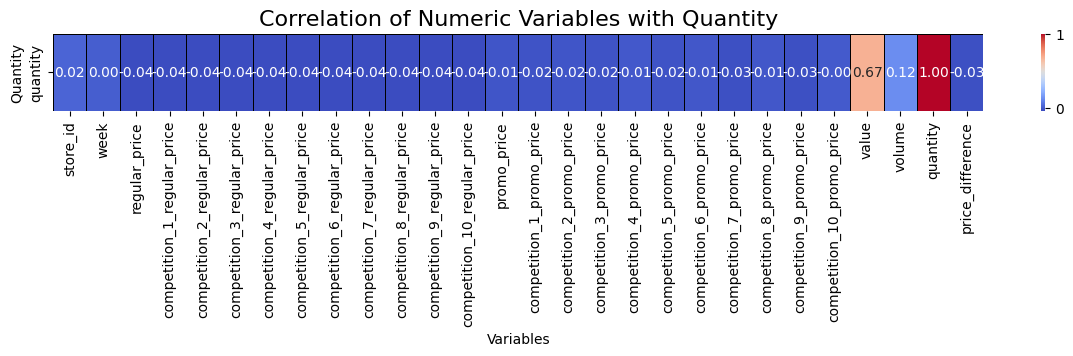

In [129]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
quantity_correlation = correlation_matrix[['quantity']].T

plt.figure(figsize=(15, 1))
sns.heatmap(quantity_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            linewidths=.5, linecolor='black')
plt.title('Correlation of Numeric Variables with Quantity', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Quantity')
plt.show()

# 2) Derive the Product Column from Descriptions

In [130]:
unique_descriptions_per_product = df.groupby('product')['description'].unique()
for product, descriptions in unique_descriptions_per_product.items():
    print(f"Product: {product}")
    # Print each unique description on a new line
    for desc in descriptions:
        print(f"- {desc}")  # Indent or bullet each description for better readability
    print("")

Product: ChocoDelight Dark 200g
- 200g ChocoDelight smooth
- A rich and smooth ChocoDelight dark chocolate bar weighing (150+50) 200 grams.
- rich ChocoDelight 200g
- ChocoDelight Dark 200g rich

Product: ChocoDelight White 350g
- 350g ChocoDelight delicious
- ChocoDelight White 350g creamy
- creamy ChocoDelight 350g
- A creamy and delicious ChocoDelight white chocolate bar weighing 350g(300g+50g)

Product: DarkDream Dark 60g
- A decadent DarkDream dark chocolate ice cream with a weight of 60 grams.
- decadent Dark 60g DarkDream
- 60g Dark DarkDream
- Dark DarkDream 60g decadent

Product: MintyFresh Mint 18g
- MintyFresh refresh mint 18grams
- 18g MintyFresh ref
- A refreshing MintyFresh candy with a weight of 9gx2
- MintyFresh 18g refresh

Product: NuttyCream Hazelnuts 80g
- delightful Hazelnuts 80g NuttyCream
- Hazelnuts NuttyCream 80g  delightful
- 80g NuttyCream flavor Hazelnuts
- A delightful NuttyCream hazelnut flavored ice cream with a weight of 80 grams.



In [131]:
#Turn to lowercase, remove inside brackets (misleading for extracting weight), change 'grams' to 'g'
df['description_new'] = df['description'].str.lower()
df['description_new'] = df['description_new'].str.replace(r"\(.*?\)", "", regex=True) #AI used for regex
df['description_new'] = df['description_new'].str.replace(" grams", "g", regex=False)
df['description_new'] = df['description_new'].str.replace("grams", "g", regex=False)
unique_descriptions_new_per_product = df.groupby('product')['description_new'].unique()
for product, descriptions in unique_descriptions_new_per_product.items():
    print(f"Product: {product}")
    # Print each unique description on a new line
    for desc in descriptions:
        print(f"- {desc}")  # Indent or bullet each description for better readability
    print("")

Product: ChocoDelight Dark 200g
- 200g chocodelight smooth
- a rich and smooth chocodelight dark chocolate bar weighing  200g.
- rich chocodelight 200g
- chocodelight dark 200g rich

Product: ChocoDelight White 350g
- 350g chocodelight delicious
- chocodelight white 350g creamy
- creamy chocodelight 350g
- a creamy and delicious chocodelight white chocolate bar weighing 350g

Product: DarkDream Dark 60g
- a decadent darkdream dark chocolate ice cream with a weight of 60g.
- decadent dark 60g darkdream
- 60g dark darkdream
- dark darkdream 60g decadent

Product: MintyFresh Mint 18g
- mintyfresh refresh mint 18g
- 18g mintyfresh ref
- a refreshing mintyfresh candy with a weight of 9gx2
- mintyfresh 18g refresh

Product: NuttyCream Hazelnuts 80g
- delightful hazelnuts 80g nuttycream
- hazelnuts nuttycream 80g  delightful
- 80g nuttycream flavor hazelnuts
- a delightful nuttycream hazelnut flavored ice cream with a weight of 80g.



In [132]:
#Extract Names
df['new_name'] = df['description_new'].apply(
    lambda x: 'ChocoDelight' if 'chocodelight' in x
              else 'MintyFresh' if 'mintyfresh' in x
              else 'DarkDream' if 'darkdream' in x
              else 'NuttyCream' if 'nuttycream' in x
              else 'Unknown'
)
print(df[['description_new','new_name']].head(20))

                                      description_new      new_name
0                         mintyfresh refresh mint 18g    MintyFresh
1                            200g chocodelight smooth  ChocoDelight
2                         350g chocodelight delicious  ChocoDelight
3                 delightful hazelnuts 80g nuttycream    NuttyCream
4   a decadent darkdream dark chocolate ice cream ...     DarkDream
5                         mintyfresh refresh mint 18g    MintyFresh
6   a rich and smooth chocodelight dark chocolate ...  ChocoDelight
7                      chocodelight white 350g creamy  ChocoDelight
8                hazelnuts nuttycream 80g  delightful    NuttyCream
9   a decadent darkdream dark chocolate ice cream ...     DarkDream
10                                 18g mintyfresh ref    MintyFresh
11  a rich and smooth chocodelight dark chocolate ...  ChocoDelight
12                           creamy chocodelight 350g  ChocoDelight
13                    80g nuttycream flavor haze

In [133]:
#Extract Weight
df['weight'] = df['description_new'].str.extract(r'(\d+)g') #AI used for regex
print(df[['description_new','weight']].head(20))
unique_weights = df['weight'].unique()
print(unique_weights)

                                      description_new weight
0                         mintyfresh refresh mint 18g     18
1                            200g chocodelight smooth    200
2                         350g chocodelight delicious    350
3                 delightful hazelnuts 80g nuttycream     80
4   a decadent darkdream dark chocolate ice cream ...     60
5                         mintyfresh refresh mint 18g     18
6   a rich and smooth chocodelight dark chocolate ...    200
7                      chocodelight white 350g creamy    350
8                hazelnuts nuttycream 80g  delightful     80
9   a decadent darkdream dark chocolate ice cream ...     60
10                                 18g mintyfresh ref     18
11  a rich and smooth chocodelight dark chocolate ...    200
12                           creamy chocodelight 350g    350
13                    80g nuttycream flavor hazelnuts     80
14                        decadent dark 60g darkdream     60
15                      

Note: 'a refreshing mintyfresh candy with a weight of 9gx2' -> extract multiplier and calculate total weight

In [134]:
#Extract multiplier and new total weight_num
df['multiplier'] = df['description_new'].str.extract(r'x(\d+)') #AI used for regex
df['weight_num'] = pd.to_numeric(df['weight'])

df['multiplier_num'] = pd.to_numeric(df['multiplier'])
df['multiplier_num'] = df['multiplier_num'].fillna(1)
df['weight_num'] = df['weight_num'] * df['multiplier_num']

unique_mult = df['multiplier_num'].unique()
print(unique_mult)
unique_weights = df['weight_num'].unique()
print(unique_weights)

[1. 2.]
[ 18. 200. 350.  80.  60.]


In [135]:
df['new_flavour'] = df['description_new'].apply(
    lambda x: 'Hazelnuts' if 'hazelnut' in x
              else 'Mint' if 'mint' in x
              else 'Dark' if 'dark' in x or 'rich' in x or 'smooth' in x
              else 'White' if 'white' in x or 'delicious' in x or 'creamy' in x
              else 'Unknown'
)
unique_flavours = df['new_flavour'].unique()
print(unique_flavours)
print(df[['description_new','new_flavour']].head(20))

['Mint' 'Dark' 'White' 'Hazelnuts']
                                      description_new new_flavour
0                         mintyfresh refresh mint 18g        Mint
1                            200g chocodelight smooth        Dark
2                         350g chocodelight delicious       White
3                 delightful hazelnuts 80g nuttycream   Hazelnuts
4   a decadent darkdream dark chocolate ice cream ...        Dark
5                         mintyfresh refresh mint 18g        Mint
6   a rich and smooth chocodelight dark chocolate ...        Dark
7                      chocodelight white 350g creamy       White
8                hazelnuts nuttycream 80g  delightful   Hazelnuts
9   a decadent darkdream dark chocolate ice cream ...        Dark
10                                 18g mintyfresh ref        Mint
11  a rich and smooth chocodelight dark chocolate ...        Dark
12                           creamy chocodelight 350g       White
13                    80g nuttycream fla

In [136]:
df['new_product'] = df['new_name'] + ' ' + df['new_flavour'] + ' ' + df['weight_num'].astype(int).astype(str) +'g'
print(df[['product','new_product']].head(20))

                     product               new_product
0        MintyFresh Mint 18g       MintyFresh Mint 18g
1     ChocoDelight Dark 200g    ChocoDelight Dark 200g
2    ChocoDelight White 350g   ChocoDelight White 350g
3   NuttyCream Hazelnuts 80g  NuttyCream Hazelnuts 80g
4         DarkDream Dark 60g        DarkDream Dark 60g
5        MintyFresh Mint 18g       MintyFresh Mint 18g
6     ChocoDelight Dark 200g    ChocoDelight Dark 200g
7    ChocoDelight White 350g   ChocoDelight White 350g
8   NuttyCream Hazelnuts 80g  NuttyCream Hazelnuts 80g
9         DarkDream Dark 60g        DarkDream Dark 60g
10       MintyFresh Mint 18g       MintyFresh Mint 18g
11    ChocoDelight Dark 200g    ChocoDelight Dark 200g
12   ChocoDelight White 350g   ChocoDelight White 350g
13  NuttyCream Hazelnuts 80g  NuttyCream Hazelnuts 80g
14        DarkDream Dark 60g        DarkDream Dark 60g
15       MintyFresh Mint 18g       MintyFresh Mint 18g
16    ChocoDelight Dark 200g    ChocoDelight Dark 200g
17   Choco

In [137]:
df['identical_flag'] = (df['product'] == df['new_product']).astype(int)
identical = df['identical_flag'].unique()
print(identical)

[1]


1 = All indentical (successful derivation)

#3) Pooled Model to Predict Quantity for Retailer 1

In [138]:
selected_columns_reg = [col for col in df.columns if col.startswith('competition') and 'regular' in col]
df['mean_value_reg'] = df[selected_columns_reg].mean(axis=1)

In [139]:
def determine_position(row):
    values = row[selected_columns_reg].tolist() + [row['regular_price']]
    sorted_values = sorted(values)
    position = sorted_values.index(row['regular_price']) + 1
    return position

df['regular_price_position'] = df.apply(determine_position, axis=1)
print(df[['regular_price', 'regular_price_position']])

      regular_price  regular_price_position
0         10.308645                       5
1          7.947956                       6
2         13.439368                       4
3          5.112777                       4
4         14.085425                       4
...             ...                     ...
8835       5.659607                       8
8836      16.313650                       4
8837      15.288729                       9
8838       5.914712                       8
8839      17.690979                       9

[8840 rows x 2 columns]


In [140]:
selected_columns_promo = [col for col in df.columns if col.startswith('competition') and 'promo' in col]
df['mean_value_promo'] = df[selected_columns_promo].mean(axis=1)
print(df)

     retailer  store_id  week                   product  \
0     retail1         1     1       MintyFresh Mint 18g   
1     retail1         1     1    ChocoDelight Dark 200g   
2     retail1         1     1   ChocoDelight White 350g   
3     retail1         1     1  NuttyCream Hazelnuts 80g   
4     retail1         1     1        DarkDream Dark 60g   
...       ...       ...   ...                       ...   
8835  retail2         7   104       MintyFresh Mint 18g   
8836  retail2         7   104    ChocoDelight Dark 200g   
8837  retail2         7   104   ChocoDelight White 350g   
8838  retail2         7   104  NuttyCream Hazelnuts 80g   
8839  retail2         7   104        DarkDream Dark 60g   

                                            description  regular_price  \
0                       MintyFresh refresh mint 18grams      10.308645   
1                              200g ChocoDelight smooth       7.947956   
2                           350g ChocoDelight delicious      13.43936

In [141]:
import numpy as np
def determine_position(row):
    if pd.notna(row['promo_price']):
        values = row[selected_columns_promo].tolist() + [row['promo_price']]
        sorted_values = sorted(values)
        position = sorted_values.index(row['promo_price']) + 1
        return position
    else:
        return np.nan

df['promo_price_position'] = df.apply(determine_position, axis=1)
print(df[['promo_price', 'promo_price_position']])

      promo_price  promo_price_position
0        6.439745                   3.0
1        4.756319                   2.0
2        8.415817                   4.0
3             NaN                   NaN
4             NaN                   NaN
...           ...                   ...
8835          NaN                   NaN
8836          NaN                   NaN
8837          NaN                   NaN
8838          NaN                   NaN
8839          NaN                   NaN

[8840 rows x 2 columns]


In [142]:
df_new = df.drop(columns=[col for col in df.columns if 'competition' in col])

In [143]:
columns_to_drop = ['multiplier_num', 'identical_flag', 'new_flavour','new_name','weight_num','description', 'new_product', 'weight','multiplier','description_new']
df_new = df_new.drop(columns=columns_to_drop)

In [144]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   retailer                8840 non-null   object 
 1   store_id                8840 non-null   int64  
 2   week                    8840 non-null   int64  
 3   product                 8840 non-null   object 
 4   regular_price           8840 non-null   float64
 5   promo_price             646 non-null    float64
 6   value                   8840 non-null   float64
 7   volume                  8840 non-null   float64
 8   quantity                8840 non-null   float64
 9   price_difference        646 non-null    float64
 10  mean_value_reg          8840 non-null   float64
 11  regular_price_position  8840 non-null   int64  
 12  mean_value_promo        646 non-null    float64
 13  promo_price_position    646 non-null    float64
dtypes: float64(9), int64(3), object(2)
memor

In [145]:
df_new['price'] = df_new['promo_price'].combine_first(df_new['regular_price'])
df_new['promo'] = df_new['promo_price'].notnull().astype(int)
df_new['price_position'] = df_new.apply(lambda row: row['promo_price_position'] if row['promo'] == 1 else row['regular_price_position'], axis=1)
df_new['mean_value'] = df_new.apply(lambda row: row['mean_value_promo'] if row['promo'] == 1 else row['mean_value_reg'], axis=1)

In [146]:
columns_to_drop = ['mean_value_promo','promo_price_position','regular_price_position','mean_value_reg','promo_price','regular_price']
df_new = df_new.drop(columns=columns_to_drop)

In [147]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   retailer          8840 non-null   object 
 1   store_id          8840 non-null   int64  
 2   week              8840 non-null   int64  
 3   product           8840 non-null   object 
 4   value             8840 non-null   float64
 5   volume            8840 non-null   float64
 6   quantity          8840 non-null   float64
 7   price_difference  646 non-null    float64
 8   price             8840 non-null   float64
 9   promo             8840 non-null   int64  
 10  price_position    8840 non-null   float64
 11  mean_value        8840 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 828.9+ KB
None


In [148]:
#Avoids Dummy Variable Trap -> not used in model!
df_new['product'] = df_new['product'].str.replace(' ', '_')
df_encoded = pd.get_dummies(df_new, columns=['product'], drop_first=True,dtype=int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   retailer                          8840 non-null   object 
 1   store_id                          8840 non-null   int64  
 2   week                              8840 non-null   int64  
 3   value                             8840 non-null   float64
 4   volume                            8840 non-null   float64
 5   quantity                          8840 non-null   float64
 6   price_difference                  646 non-null    float64
 7   price                             8840 non-null   float64
 8   promo                             8840 non-null   int64  
 9   price_position                    8840 non-null   float64
 10  mean_value                        8840 non-null   float64
 11  product_ChocoDelight_White_350g   8840 non-null   int64  
 12  produc

In [149]:
df_retailer1 = df_encoded[df_encoded['retailer'] == 'retail1']
df_retailer1 = df_retailer1.drop(columns=['retailer'])
print(df_retailer1.head(5))

   store_id  week      value    volume   quantity  price_difference  \
0         1     1  85.368310  3.953882   9.707949          3.868900   
1         1     1  82.924731  2.991418  14.922586          3.191637   
2         1     1  52.527762  6.513600  12.889607          5.023551   
3         1     1  48.373782  5.489587  14.374834               NaN   
4         1     1  47.718252  9.152050   9.193818               NaN   

       price  promo  price_position  mean_value  \
0   6.439745      1             3.0    7.338034   
1   4.756319      1             2.0    5.721318   
2   8.415817      1             4.0    9.241160   
3   5.112777      0             4.0    5.153950   
4  14.085425      0             4.0   14.210322   

   product_ChocoDelight_White_350g  product_DarkDream_Dark_60g  \
0                                0                           0   
1                                0                           0   
2                                1                           0   
3 

In [150]:
df_retailer1['price_difference'] = df_retailer1['price_difference'].fillna(0)

In [151]:
print(df_retailer1.head(5))

   store_id  week      value    volume   quantity  price_difference  \
0         1     1  85.368310  3.953882   9.707949          3.868900   
1         1     1  82.924731  2.991418  14.922586          3.191637   
2         1     1  52.527762  6.513600  12.889607          5.023551   
3         1     1  48.373782  5.489587  14.374834          0.000000   
4         1     1  47.718252  9.152050   9.193818          0.000000   

       price  promo  price_position  mean_value  \
0   6.439745      1             3.0    7.338034   
1   4.756319      1             2.0    5.721318   
2   8.415817      1             4.0    9.241160   
3   5.112777      0             4.0    5.153950   
4  14.085425      0             4.0   14.210322   

   product_ChocoDelight_White_350g  product_DarkDream_Dark_60g  \
0                                0                           0   
1                                0                           0   
2                                1                           0   
3 

In [152]:
from sklearn.preprocessing import MinMaxScaler
features = df_retailer1.drop(columns=['quantity','store_id','week','price_position','promo']).select_dtypes(include=['number'])

out = df_retailer1[['quantity', 'store_id', 'week', 'price_position', 'promo']]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled = pd.concat([df_scaled, out.reset_index(drop=True)], axis=1)


In [153]:
print(df_scaled.head(5))

      value    volume  price_difference     price  mean_value  \
0  0.837788  0.328203          0.418070  0.209839    0.234275   
1  0.810621  0.221258          0.344886  0.111734    0.139231   
2  0.472679  0.612629          0.542841  0.324999    0.346156   
3  0.426497  0.498845          0.000000  0.132508    0.105877   
4  0.419209  0.905802          0.000000  0.655406    0.638283   

   product_ChocoDelight_White_350g  product_DarkDream_Dark_60g  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         1.0   

   product_MintyFresh_Mint_18g  product_NuttyCream_Hazelnuts_80g   quantity  \
0                          1.0                               0.0   9.707949   
1                          0.0                        

In [177]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols



y = df_retailer1['quantity']
X = df_retailer1.drop('quantity',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train = sm.add_constant(X_train)

In [187]:
product_columns = ' + '.join([col for col in X_train.columns if col.startswith('product')])
print(f'{product_columns}')
formula = f'quantity ~ C(store_id) * C(promo) + week + price_position + mean_value + value + volume + price_difference + price + {product_columns}'
model = ols(formula, data=pd.concat([X_train, y_train], axis=1)).fit()

product_ChocoDelight_White_350g + product_DarkDream_Dark_60g + product_MintyFresh_Mint_18g + product_NuttyCream_Hazelnuts_80g


In [188]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:11:52   Log-Likelihood:                -11557.
No. Observations:                4680   AIC:                         2.318e+04
Df Residuals:                    4649   BIC:                         2.338e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

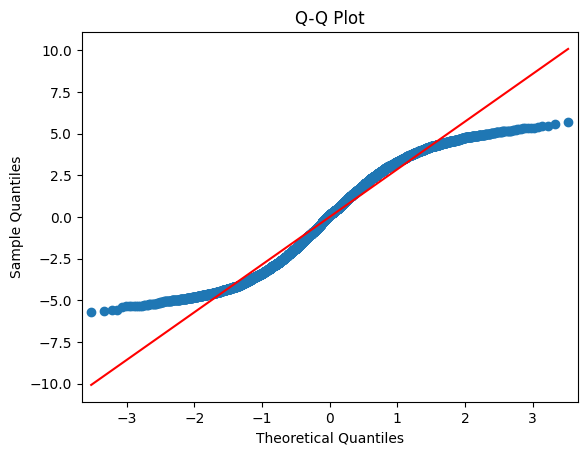

Mean Absolute Error: 2.470109523631637
Mean Squared Error: 8.175799740752579
Root Mean Squared Error: 2.8593355418265585


In [189]:
residuals = model.resid
fitted = model.fittedvalues

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

mae = np.mean(np.abs(residuals))
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

In [172]:
df_final=df_retailer1
df_final['pred_quantity'] = model.predict(df_retailer1)

print(df_final.head(10))

   store_id  week      value    volume   quantity  price_difference  \
0         1     1  85.368310  3.953882   9.707949          3.868900   
1         1     1  82.924731  2.991418  14.922586          3.191637   
2         1     1  52.527762  6.513600  12.889607          5.023551   
3         1     1  48.373782  5.489587  14.374834          0.000000   
4         1     1  47.718252  9.152050   9.193818          0.000000   
5         1     2  69.843501  7.465654  11.184854          0.000000   
6         1     2  54.003260  1.880907   8.095620          0.000000   
7         1     2  73.895529  6.809493   8.550715          0.000000   
8         1     2  58.726976  7.318122   8.072842          5.653293   
9         1     2  81.126346  6.809740   9.360454          0.000000   

       price  promo  price_position  mean_value  \
0   6.439745      1             3.0    7.338034   
1   4.756319      1             2.0    5.721318   
2   8.415817      1             4.0    9.241160   
3   5.112777  

#4) Bayesian Model to Predict Quantity for Retailer 2